In [1]:
%load_ext autoreload
%autoreload 2
from funman_demo.example.demo120822 import Scenario1, Scenario2
from IPython.display import Markdown as md

# Scenario 1
0. No Intervention
1. Intervene at day 1, 0.05 reduction in transmissibility
2. Intervene at day 30, X reduction in transmissibility


In [3]:
# Scenario 1 models
scenario1 = Scenario1()
models = "SIR+H" #scenario1.models["intervention1"]
scenario1.to_md(scenario1.models["intervention1"])

# Bilayer and Measurement Model
SIR Bilayer (left), Hospitalized Measurement (right)

![](SIR+H_bilayer.png) ![](SIR+H_measurement.png)
# Initial State (population 10000)
- ## R: 1
- ## S: 9998
- ## I: 1
# Parameter Bounds
- ## beta: [6.7e-05, 6.7e-05]
- ## gamma: [0.07142857142857142, 0.07142857142857142]
- ## hr: [0.01, 0.01]
# Scenario Configuration
- ## step_size: 1
- ## query_variable: H
- ## query_threshold: 10000
- ## duration: 1
# Query
- ## $\bigwedge\limits_{t \in [0,1]} H_t \leq10000$

# Bilayer and Measurement Model
SIR Bilayer (left), Hospitalized Measurement (right)

![](SVIIR_bilayer.png) ![](SVIIR_measurement.png)
# Initial State (population 10000)
- ## V: 1
- ## I_v: 1
- ## S: 10000
- ## I: 1
- ## R: 1
# Parameter Bounds
- ## gamma_1: [0.07142857142857142, 0.07142857142857142]
- ## gamma_2: [0.07142857142857142, 0.07142857142857142]
- ## v_r: [0.001, 0.001]
- ## beta_1: [6.7e-05, 6.7e-05]
- ## v_s2: [6.7e-05, 6.7e-05]
- ## hr_1: [0.01, 0.01]
- ## beta_2: [6.7e-05, 6.7e-05]
- ## hr_2: [0.01, 0.01]
- ## v_s1: [6.7e-05, 6.7e-05]
# Scenario Configuration
- ## step_size: 1
- ## query_variable: H
- ## query_threshold: 10000
- ## duration: 1
# Query
- ## $\bigwedge\limits_{t \in [0,1]} H_t \leq10000$

# Bilayer and Measurement Model
SIR Bilayer (left), Hospitalized Measurement (right)

![](Bucky_bilayer.png) ![](Bucky_measurement.png)
# Initial State (population 10000)
- ## I_asym: 1
- ## R_hosp: 1
- ## S: 10000
- ## I_crit: 1
- ## E: 100
- ## I_mild: 1
- ## R: 1
- ## D: 0
# Parameter Bounds
- ## gamma_1: [0.07142857142857142, 0.07142857142857142]
- ## gamma_2: [0.07142857142857142, 0.07142857142857142]
- ## delta_3: [0.001, 0.001]
- ## delta_2: [0.01, 0.01]
- ## beta_1: [6.7e-05, 6.7e-05]
- ## gamma_h: [0.07142857142857142, 0.07142857142857142]
- ## delta_4: [0.0056, 0.0056]
- ## beta_2: [6.7e-05, 6.7e-05]
- ## theta: [0.03333333333333333, 0.03333333333333333]
- ## hr: [1.0, 1.0]
- ## sigma: [0.01, 0.01]
- ## delta_1: [3.3e-05, 3.3e-05]
# Scenario Configuration
- ## step_size: 1
- ## query_variable: H
- ## query_threshold: 10000
- ## duration: 1
# Query
- ## $\bigwedge\limits_{t \in [0,1]} H_t \leq10000$


In [108]:
# Setup 

duration = 20
step_size = 1
hospital_capacity = 50 
transmissibility_reduction = 0.0


# scenario1 = Scenario1(duration=duration, query_threshold=hospital_capacity, step_size=step_size)
# results = scenario1.analyze_intervention_1(transmissibility_reduction, models=models)
# print("\n".join([f"{n}: Maximum Hospital usage: {r['dataframe']['H'].max()}" for n, r in results.items() if r['dataframe'] is not None]))

In [109]:
# 0. No intervention. Will H_t <= hospital_capacity forall t?

# Create and Evaluate Scenario and Intervention
scenario1_i0 = Scenario1(duration=duration, query_threshold=hospital_capacity, step_size=step_size)
results1_i0 = scenario1_i0.analyze_intervention_1(transmissibility_reduction, models=models)

# Output Results
print("\n".join([r["message"] for n, r in results1_i0.items()]))
scenario1_i0.compare_model_results(results1_i0)

Analyzing Model: SIR+H ...
SIR+H: Query Not Satisfied
No results to plot ...


Analyzing Model: SIR+H ...


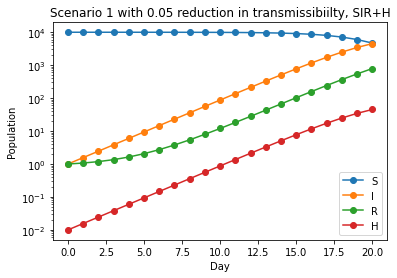

SIR+H: Query Satisfied


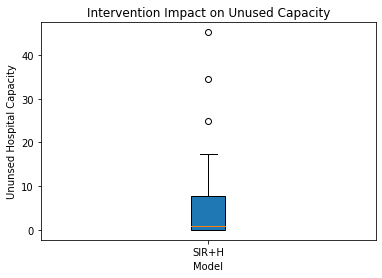

In [110]:
# 1. Intervene with 0.05 reduction in transmissibility.  Will H_t <= hospital_capacity forall t?

transmissibility_reduction = 0.05

# Create and Evaluate Scenario and Intervention
scenario1_i1 = Scenario1(duration=duration, query_threshold=hospital_capacity, step_size=step_size)
results1_i1 = scenario1_i1.analyze_intervention_1(transmissibility_reduction, models=models)

# Output Results
print("\n".join([r["message"] for n, r in results1_i1.items()]))
scenario1_i1.compare_model_results(results1_i1)

Starting initializing dynamics of model
Initialized dynamics of model
Checking true query
--- False(dict_values([[5.695e-05, 7.035e-05]]))


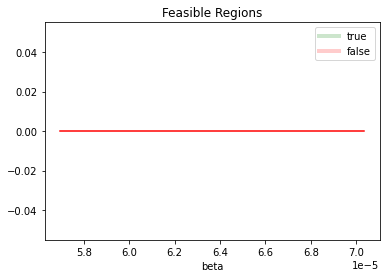

In [113]:
# Intervention 2 is over a shorter time period, with different initial conditions

# What is S, I, and R at day 30, with no intervervention?
start_day = duration-7
scenario1_i2pre = Scenario1(duration=start_day, step_size=step_size, query_threshold=hospital_capacity)
transmissibility_reduction = 0.0
results1_i2pre = scenario1_i2pre.analyze_intervention_1(transmissibility_reduction, models=models)

Starting initializing dynamics of model
Initialized dynamics of model
Checking true query
Checking false query
Split(dict_values([[4.69e-05, 8.04e-05]]))
Checking true query
--- False(dict_values([[7.258088960509471e-05, 8.04e-05]]))
Checking true query
Checking false query
Split(dict_values([[4.69e-05, 7.258088960509471e-05]]))
Checking true query
Checking false query
Split(dict_values([[7.105021509599152e-05, 7.258088960509471e-05]]))
Checking true query
Checking false query
+++ True(dict_values([[4.69e-05, 7.105021509599152e-05]]))
Checking true query
--- False(dict_values([[7.195644092097952e-05, 7.258088960509471e-05]]))
Checking true query
Checking false query
Split(dict_values([[7.105021509599152e-05, 7.195644092097952e-05]]))
Checking true query
Checking false query
Split(dict_values([[7.172397932184982e-05, 7.195644092097952e-05]]))
Checking true query
Checking false query
+++ True(dict_values([[7.105021509599152e-05, 7.172397932184982e-05]]))
Checking true query
--- False(dic

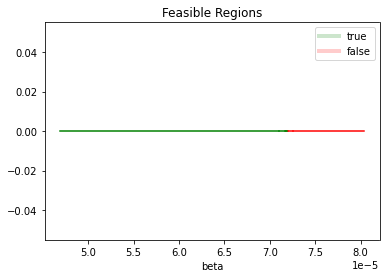

In [119]:
scenario1_i2 = Scenario1(duration=6, query_threshold=hospital_capacity, step_size=step_size)
init_values={ model_name : { k: results1_i2pre[model_name]["dataframe"].loc[start_day][k] 
                             for k in model.init_values.keys() } 
              for model_name, model in scenario1_i2.models["intervention2"].items() if model_name in models }
init_values
margin=0.25
results1_i2 = scenario1_i2.analyze_intervention_2([0.05-margin, 0.05+margin], models=models, init_values=init_values)


<AxesSubplot:title={'center':'Intervention Impact on Unused Capacity'}, xlabel='Reduction in Transmissibility', ylabel='Ununsed Hospital Capacity'>

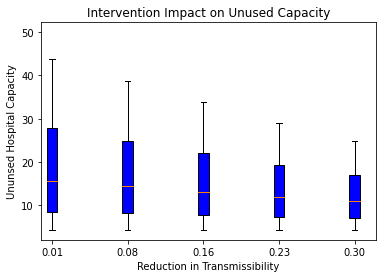

In [155]:
#points = scenario1_i2.extract_true_points(results1_i2, {"SIR+H": "beta", "SVIIR": "beta_1", "Bucky": "beta_1"}, num_points=5)
scenario1_i2.plot_points(points, width=.01)

<!-- (:process infection
 :parameters (?gamma)
 :precondition (and)
 :effect (and 
            (increase (I) (function1))
            (increase (R) (function2))
            (increase (S) (function3))
            )
 )

 (:durative-action mandate
  :parameters ()
  :duraiton (?duration)
  :precondition (and)
  :effect (and (at-start (increase (beta) (function1))
                (at-end (decrease (beta) (function1))))
  )

  (:event infected-threshold
   :precondtion (>= I 1000)
   :effect (fail)
   ) -->

# Scenario 2
Synthesize Vaccination Rate to Cause Infected to fall below a threhold by 

In [ ]:
scenario2 = Scenario2(duration=20, query_threshold=hospital_capacity, step_size=2)
results = scenario2.analyze_intervention_vaccination([-0.05, 0.1])
